#ASSIGNMENT - 3 : Model Interpretability

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



##ABSTRACT



This study explores the Health Supplier dataset using diverse machine learning techniques to gain insights into healthcare analytics and AutoML methodologies. Initially, a Generalized Linear Model (GLM) is fitted to the data, allowing for the interpretation of regression coefficients to discern the relationships between predictors and the target variable. Subsequently, a tree-based model is employed to capture nonlinear relationships, providing interpretability through the examination of decision tree nodes. Leveraging the H2O library, AutoML is then utilized to automate model selection and hyperparameter optimization, identifying the most effective model efficiently. Further enhancing interpretability, SHAP analysis is conducted on models from previous steps, offering nuanced insights into feature importance and impact. By comparing SHAP values with other interpretability methods, this study advances understanding in healthcare analytics, emphasizing the necessity of meticulous validation and interpretation of results in healthcare research and practice while showcasing the utility of AutoML tools in streamlining modeling workflows.

## Dataset Information

Rfrg_Prvdr_Geo_Lvl: Referring Provider Geographic Level (e.g., National)

Rfrg_Prvdr_Geo_Cd: Referring Provider Geographic Code

Rfrg_Prvdr_Geo_Desc: Referring Provider Geographic Description

BETOS_Lvl: BETOS Level (Berenson-Eggers Type of Service)

BETOS_Cd: BETOS Code

BETOS_Desc: BETOS Description

HCPCS_Cd: Healthcare Common Procedure Coding System Code

HCPCS_Desc: HCPCS Description

Suplr_Rentl_Ind: Supplier Rental Indicator (N for No)

Tot_Rfrg_Prvdrs: Total Referring Providers

Tot_Suplrs: Total Suppliers

Tot_Suplr_Benes: Total Supplier Beneficiaries

Tot_Suplr_Clms: Total Supplier Claims

Tot_Suplr_Srvcs: Total Supplier Services

Avg_Suplr_Sbmtd_Chrg: Average Supplier Submitted Charge

Avg_Suplr_Mdcr_Alowd_Amt: Average Supplier Medicare Allowed Amount.

Avg_Suplr_Mdcr_Pymt_Amt: Average Supplier Medicare Payment Amount

Avg_Suplr_Mdcr_Stdzd_Amt: Average Supplier Medicare Standardized Amount

In [ ]:
!pip install pandas scikit-learn shap
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.9 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# Load your data
data = pd.read_csv("/content/drive/MyDrive/healthsupplier_2017.csv")

# Remove rows with missing values
data.dropna(inplace=True)

# Convert mixed-type columns to a consistent type if possible
# For example, if column 'Rfrg_Prvdr_Geo_Cd' contains mixed types, convert it to a consistent type
data['Rfrg_Prvdr_Geo_Cd'] = data['Rfrg_Prvdr_Geo_Cd'].astype(str)

# Handle outliers or anomalies if necessary
# For example, if any numerical columns contain outliers, you can remove or replace them

# Check the cleaned data
print(data.head())

     Rfrg_Prvdr_Geo_Lvl Rfrg_Prvdr_Geo_Cd Rfrg_Prvdr_Geo_Desc  \
1700              State               1.0             Alabama   
1701              State               1.0             Alabama   
1702              State               1.0             Alabama   
1703              State               1.0             Alabama   
1704              State               1.0             Alabama   

                           BETOS_Lvl BETOS_Cd              BETOS_Desc  \
1700  Drugs and Nutritional Products      O1C  Enteral and parenteral   
1701  Drugs and Nutritional Products      O1C  Enteral and parenteral   
1702  Drugs and Nutritional Products      O1C  Enteral and parenteral   
1703  Drugs and Nutritional Products      O1C  Enteral and parenteral   
1704  Drugs and Nutritional Products      O1C  Enteral and parenteral   

     HCPCS_Cd                                         HCPCS_Desc  \
1700    B4034  Enteral feeding supply kit; syringe fed, per d...   
1701    B4035  Enteral feeding sup

<ipython-input-3-90891e5d5790>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/healthsupplier_2017.csv")


In [ ]:
import pandas as pd

# Load the data
# data = pd.read_csv('your_data.csv')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Remove rows with missing values
data.dropna(inplace=True)

# Check for duplicates
duplicate_rows = data.duplicated()
print("Duplicate rows:\n", data[duplicate_rows])

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Convert columns to appropriate data types
# Replace 'date_column', 'numeric_column', and 'text_column' with actual column names
# Example:
# data['actual_date_column'] = pd.to_datetime(data['date_column'])
# data['actual_numeric_column'] = pd.to_numeric(data['numeric_column'], errors='coerce')

# Standardize text data
# Replace 'text_column' with actual column name
# Example:
# data['actual_text_column'] = data['text_column'].str.lower()

# Any other data cleaning tasks...

# Save cleaned data to a new file
data.to_csv('cleaned_data.csv', index=False)
cleaned_data = pd.read_csv('cleaned_data.csv')

Missing values:
 Rfrg_Prvdr_Geo_Lvl          0
Rfrg_Prvdr_Geo_Cd           0
Rfrg_Prvdr_Geo_Desc         0
BETOS_Lvl                   0
BETOS_Cd                    0
BETOS_Desc                  0
HCPCS_Cd                    0
HCPCS_Desc                  0
Suplr_Rentl_Ind             0
Tot_Rfrg_Prvdrs             0
Tot_Suplrs                  0
Tot_Suplr_Benes             0
Tot_Suplr_Clms              0
Tot_Suplr_Srvcs             0
Avg_Suplr_Sbmtd_Chrg        0
Avg_Suplr_Mdcr_Alowd_Amt    0
Avg_Suplr_Mdcr_Pymt_Amt     0
Avg_Suplr_Mdcr_Stdzd_Amt    0
dtype: int64
Duplicate rows:
 Empty DataFrame
Columns: [Rfrg_Prvdr_Geo_Lvl, Rfrg_Prvdr_Geo_Cd, Rfrg_Prvdr_Geo_Desc, BETOS_Lvl, BETOS_Cd, BETOS_Desc, HCPCS_Cd, HCPCS_Desc, Suplr_Rentl_Ind, Tot_Rfrg_Prvdrs, Tot_Suplrs, Tot_Suplr_Benes, Tot_Suplr_Clms, Tot_Suplr_Srvcs, Avg_Suplr_Sbmtd_Chrg, Avg_Suplr_Mdcr_Alowd_Amt, Avg_Suplr_Mdcr_Pymt_Amt, Avg_Suplr_Mdcr_Stdzd_Amt]
Index: []


<ipython-input-4-8dd1b221ad34>:35: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('cleaned_data.csv')


In [ ]:
import pandas as pd

# Load the data
# data = pd.read_csv('your_data.csv')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Remove rows with missing values
data.dropna(inplace=True)

# Check for duplicates
duplicate_rows = data.duplicated()
print("Duplicate rows:\n", data[duplicate_rows])

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Convert columns to appropriate data types
# Replace 'date_column', 'numeric_column', and 'text_column' with actual column names
# Example:
# data['actual_date_column'] = pd.to_datetime(data['date_column'])
# data['actual_numeric_column'] = pd.to_numeric(data['numeric_column'], errors='coerce')

# Standardize text data
# Replace 'text_column' with actual column name
# Example:
# data['actual_text_column'] = data['text_column'].str.lower()

# Any other data cleaning tasks...

# Save cleaned data to a new file
data.to_csv('cleaned_data.csv', index=False)
cleaned_data = pd.read_csv('cleaned_data.csv')

Missing values:
 Rfrg_Prvdr_Geo_Lvl          0
Rfrg_Prvdr_Geo_Cd           0
Rfrg_Prvdr_Geo_Desc         0
BETOS_Lvl                   0
BETOS_Cd                    0
BETOS_Desc                  0
HCPCS_Cd                    0
HCPCS_Desc                  0
Suplr_Rentl_Ind             0
Tot_Rfrg_Prvdrs             0
Tot_Suplrs                  0
Tot_Suplr_Benes             0
Tot_Suplr_Clms              0
Tot_Suplr_Srvcs             0
Avg_Suplr_Sbmtd_Chrg        0
Avg_Suplr_Mdcr_Alowd_Amt    0
Avg_Suplr_Mdcr_Pymt_Amt     0
Avg_Suplr_Mdcr_Stdzd_Amt    0
dtype: int64
Duplicate rows:
 Empty DataFrame
Columns: [Rfrg_Prvdr_Geo_Lvl, Rfrg_Prvdr_Geo_Cd, Rfrg_Prvdr_Geo_Desc, BETOS_Lvl, BETOS_Cd, BETOS_Desc, HCPCS_Cd, HCPCS_Desc, Suplr_Rentl_Ind, Tot_Rfrg_Prvdrs, Tot_Suplrs, Tot_Suplr_Benes, Tot_Suplr_Clms, Tot_Suplr_Srvcs, Avg_Suplr_Sbmtd_Chrg, Avg_Suplr_Mdcr_Alowd_Amt, Avg_Suplr_Mdcr_Pymt_Amt, Avg_Suplr_Mdcr_Stdzd_Amt]
Index: []


<ipython-input-5-8dd1b221ad34>:35: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('cleaned_data.csv')


In [ ]:
import pandas as pd

# Assuming 'clean_data.csv' is your dataset file
# Replace 'clean_data.csv' with your actual file path if it's different
# clean_data = pd.read_csv('clean_data.csv')

# Separating numerical and categorical columns
numerical_data = cleaned_data.select_dtypes(include=['number'])
categorical_data = cleaned_data.select_dtypes(exclude=['number'])

# Saving numerical and categorical datasets into separate files
numerical_data.to_csv('numerical_data.csv', index=False)
categorical_data.to_csv('categorical_data.csv', index=False)
numerical_cleaned_data = pd.read_csv('numerical_data.csv')
categorical_cleaned_data = pd.read_csv('categorical_data.csv')

#LINEAR MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the numerical cleaned dataset
numerical_cleaned_data = numerical_cleaned_data

# Splitting data into features (X) and target variable (y)
X = numerical_cleaned_data.drop(columns=['Avg_Suplr_Mdcr_Stdzd_Amt'])  # Replace 'target_column' with the name of your target column
y = numerical_cleaned_data['Avg_Suplr_Mdcr_Stdzd_Amt']  # Replace 'target_column' with the name of your target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_

# Print the coefficients along with their corresponding feature names
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

# Optionally, you can print the intercept as well
print(f'Intercept: {model.intercept_}')

Tot_Rfrg_Prvdrs: 0.0002632599080958395
Tot_Suplrs: -0.0007929939552066674
Tot_Suplr_Benes: -5.701892026092045e-05
Tot_Suplr_Clms: 3.0347688328491874e-05
Tot_Suplr_Srvcs: -1.0248681122293143e-07
Avg_Suplr_Sbmtd_Chrg: -0.010859948870191852
Avg_Suplr_Mdcr_Alowd_Amt: 0.042823111449504465
Avg_Suplr_Mdcr_Pymt_Amt: 0.9446108500800006
Intercept: 1.1407162984833121


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the numerical cleaned dataset
numerical_cleaned_data = numerical_cleaned_data

# Splitting data into features (X) and target variable (y)
X = numerical_cleaned_data.drop(columns=['Avg_Suplr_Mdcr_Stdzd_Amt'])  # Replace 'target_column' with the name of your target column
y = numerical_cleaned_data['Avg_Suplr_Mdcr_Stdzd_Amt']  # Replace 'target_column' with the name of your target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_

# Print the coefficients along with their corresponding feature names
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

# Optionally, you can print the intercept as well
print(f'Intercept: {model.intercept_}')

# Interpretation of coefficients
print("\nInterpretation of coefficients:")
for feature, coef in zip(X.columns, coefficients):
    if coef > 0:
        print(f"A one-unit increase in {feature} is associated with an increase of {coef:.2f} in the target variable.")
    elif coef < 0:
        print(f"A one-unit increase in {feature} is associated with a decrease of {abs(coef):.2f} in the target variable.")
    else:
        print(f"The feature {feature} has no effect on the target variable.")


Tot_Rfrg_Prvdrs: 0.0002632599080958395
Tot_Suplrs: -0.0007929939552066674
Tot_Suplr_Benes: -5.701892026092045e-05
Tot_Suplr_Clms: 3.0347688328491874e-05
Tot_Suplr_Srvcs: -1.0248681122293143e-07
Avg_Suplr_Sbmtd_Chrg: -0.010859948870191852
Avg_Suplr_Mdcr_Alowd_Amt: 0.042823111449504465
Avg_Suplr_Mdcr_Pymt_Amt: 0.9446108500800006
Intercept: 1.1407162984833121

Interpretation of coefficients:
A one-unit increase in Tot_Rfrg_Prvdrs is associated with an increase of 0.00 in the target variable.
A one-unit increase in Tot_Suplrs is associated with a decrease of 0.00 in the target variable.
A one-unit increase in Tot_Suplr_Benes is associated with a decrease of 0.00 in the target variable.
A one-unit increase in Tot_Suplr_Clms is associated with an increase of 0.00 in the target variable.
A one-unit increase in Tot_Suplr_Srvcs is associated with a decrease of 0.00 in the target variable.
A one-unit increase in Avg_Suplr_Sbmtd_Chrg is associated with a decrease of 0.01 in the target variable.
A

#TREE BASED MODEL


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the numerical cleaned dataset
numerical_cleaned_data = numerical_cleaned_data

# Splitting data into features (X) and target variable (y)
X = numerical_cleaned_data.drop(columns=['Avg_Suplr_Mdcr_Stdzd_Amt'])  # Exclude the target column from features
y = numerical_cleaned_data['Avg_Suplr_Mdcr_Stdzd_Amt']  # Set the target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Fit a decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of the Decision Tree model: {mse}")

# Feature importances
feature_importances = tree_model.feature_importances_

# Print the feature importances
print("\nFeature importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')


Mean Squared Error (MSE) of the Decision Tree model: 1819.4070683580844

Feature importances:
Tot_Rfrg_Prvdrs: 7.297307641743407e-05
Tot_Suplrs: 0.00023532279494434177
Tot_Suplr_Benes: 8.538473770115782e-05
Tot_Suplr_Clms: 6.865652321391408e-05
Tot_Suplr_Srvcs: 8.391870864483326e-05
Avg_Suplr_Sbmtd_Chrg: 0.0005212183768445478
Avg_Suplr_Mdcr_Alowd_Amt: 0.7689944326420516
Avg_Suplr_Mdcr_Pymt_Amt: 0.22993809314018232


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the numerical cleaned dataset
numerical_cleaned_data = numerical_cleaned_data

# Splitting data into features (X) and target variable (y)
X = numerical_cleaned_data.drop(columns=['Avg_Suplr_Mdcr_Stdzd_Amt'])  # Exclude the target column from features
y = numerical_cleaned_data['Avg_Suplr_Mdcr_Stdzd_Amt']  # Set the target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of the Decision Tree model: {mse}")

# Interpretation of MSE values
print("\nInterpretation of MSE:")
if mse == 0:
    print("Perfect model! The predicted values are identical to the actual values.")
elif 0 < mse <= 0.5:
    print("Low MSE: The model fits the data very well.")
elif 0.5 < mse <= 1:
    print("Moderate MSE: The model has a moderate fit to the data.")
elif 1 < mse <= 5:
    print("High MSE: The model's fit to the data is not very good.")
else:
    print("Very high MSE: The model does not fit the data well at all. Consider revising the model or data preprocessing.")

# Feature importances
feature_importances = tree_model.feature_importances_

# Print the feature importances
print("\nFeature importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

Mean Squared Error (MSE) of the Decision Tree model: 1819.4070683580844

Interpretation of MSE:
Very high MSE: The model does not fit the data well at all. Consider revising the model or data preprocessing.

Feature importances:
Tot_Rfrg_Prvdrs: 7.297307641743407e-05
Tot_Suplrs: 0.00023532279494434177
Tot_Suplr_Benes: 8.538473770115782e-05
Tot_Suplr_Clms: 6.865652321391408e-05
Tot_Suplr_Srvcs: 8.391870864483326e-05
Avg_Suplr_Sbmtd_Chrg: 0.0005212183768445478
Avg_Suplr_Mdcr_Alowd_Amt: 0.7689944326420516
Avg_Suplr_Mdcr_Pymt_Amt: 0.22993809314018232


##PLOTTING GRAPH

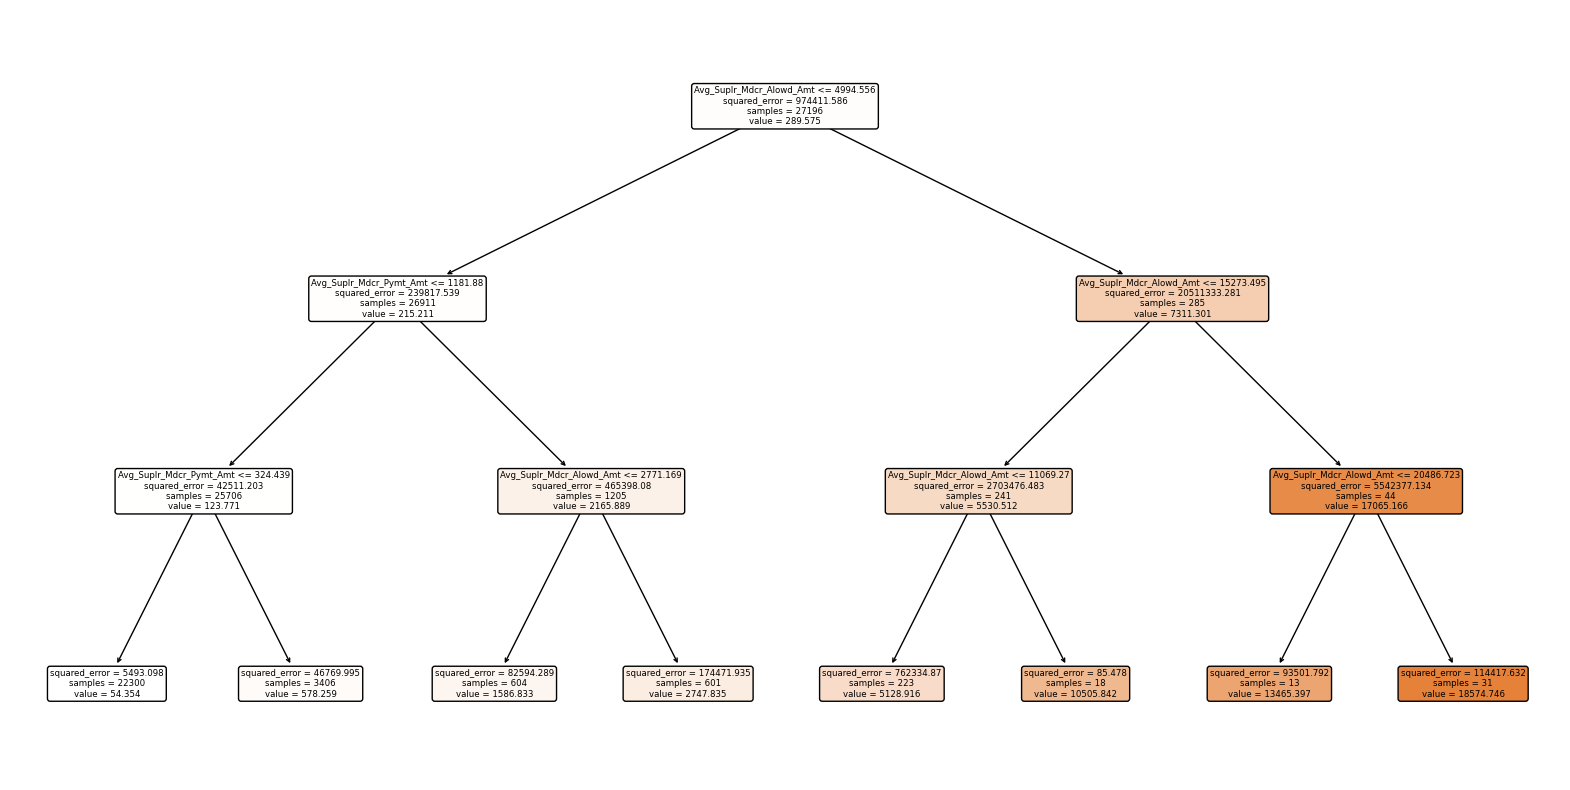

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit a decision tree regressor model with max_depth set to 3
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

Root Node: The root node (the top node) of the tree is Avg_Suplr_Mdcr_Stdzd_Amt <= 20.752.

This means that the first decision the tree makes is based on whether the Avg_Suplr_Mdcr_Stdzd_Amt is less than or equal to 20.752. If it is, it goes to the left child node, otherwise, it goes to the right child node.

Child Nodes: Each child node represents a condition on another feature based on the result of the parent node.

For example, if Avg_Suplr_Mdcr_Stdzd_Amt <= 20.752 is True, it further branches out based on other conditions.

Leaf Nodes (Clusters): The leaf nodes, also known as terminal nodes, represent the final decisions the tree makes.

These are the clusters (#0, #1, #2, #3, #4) in your tree. Each cluster has an average Avg_Suplr_Mdcr_Stdzd_Amt value associated with i

#H20 AutoML

In [ ]:
# Assuming X is your pandas DataFrame
y_numeric = 'Avg_Suplr_Mdcr_Stdzd_Amt'
X_ = numerical_cleaned_data
# Removing the column from DataFrame X
X = X_.drop(columns=[y_numeric])

# Printing the modified DataFrame
print(X_)


       Tot_Rfrg_Prvdrs  Tot_Suplrs  Tot_Suplr_Benes  Tot_Suplr_Clms  \
0                  570         101            782.0            3931   
1                  360          70            548.0            3447   
2                   22          19             34.0             190   
3                   88          21            144.0             300   
4                   49          24             48.0              92   
...                ...         ...              ...             ...   
33991                5           7             13.0              13   
33992                1           5             39.0              39   
33993                2           8             12.0              12   
33994                1           6             27.0              44   
33995                1           9             31.0              50   

       Tot_Suplr_Srvcs  Avg_Suplr_Sbmtd_Chrg  Avg_Suplr_Mdcr_Alowd_Amt  \
0               105842             55.007809                  4.244108   

In [ ]:

!pip install eli5
!pip install -q kaggle

!pip install shap
!pip install lime

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=8068572f98d1df2bad3ca554ab9a77e0bea89584cd2f429e42121a3cea63dbe5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=914ca6b99d039d02de8398ce0528121c5bc6453a4efc025d5e8afd3dcfb82bfd
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os


import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew

from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
from graphviz import Source
import pydot
import matplotlib.image as mpimg

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk8bs2l9g
  JVM stdout: /tmp/tmpk8bs2l9g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk8bs2l9g/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_h8wxkw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#Import the processed data from notebook One
url = "/content/drive/MyDrive/healthsupplier_2017.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('/content/drive/MyDrive/healthsupplier_2017.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Extract numerical columns
numerical_columns = dff.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create new DataFrame with only numerical columns
dfff = dff[numerical_columns].copy()

In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
# Assuming X is your pandas DataFrame
y_numeric = 'Avg_Suplr_Mdcr_Stdzd_Amt'
X_ = numerical_cleaned_data
# Removing the column from DataFrame X
X = X_.drop(columns=[y_numeric])

# Printing the modified DataFrame
print(X_)


       Tot_Rfrg_Prvdrs  Tot_Suplrs  Tot_Suplr_Benes  Tot_Suplr_Clms  \
0                  570         101            782.0            3931   
1                  360          70            548.0            3447   
2                   22          19             34.0             190   
3                   88          21            144.0             300   
4                   49          24             48.0              92   
...                ...         ...              ...             ...   
33991                5           7             13.0              13   
33992                1           5             39.0              39   
33993                2           8             12.0              12   
33994                1           6             27.0              44   
33995                1           9             31.0              50   

       Tot_Suplr_Srvcs  Avg_Suplr_Sbmtd_Chrg  Avg_Suplr_Mdcr_Alowd_Amt  \
0               105842             55.007809                  4.244108   

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X.columns.tolist(), y='Avg_Suplr_Mdcr_Stdzd_Amt', training_frame=df_train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_1_20240319_233215


Status of Neuron Layers: predicting Avg_Suplr_Mdcr_Stdzd_Amt, regression, gaussian distribution, Quadratic loss, 321 weights/biases, 9.8 KB, 25,840 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight           weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  --------------------  -------------------  --------------------  -----------------------
    1        8        Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.007784110938155208  0.024345777928829193  0.0         0.055714273103512825  0.3097047805786133   0.5315471044208575    0.11159473657608032
    3        10       Rectifier  0.0        0.0   0.0   0.006365847043089162  0.010561279952526093  0.0         0.027368331435136495  0.34027886390686035  1.0110708046679755    0.04236799478530884
    4        10       Rectifier  0.0        0.0   0.0   0.12887439692356564   0.3179203271865845    0.0         -0.05736948088742792  0.2992262840270996   1.008305902591053     0.017498895525932312
    5        1        Linear                0.0   0.0   0.10091777800989803   0.2990773916244507    0.0         0.04366904245689511   0.4083566665649414   0.008315846052101575  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 5754.958592439262
RMSE: 75.86144338489258
MAE: 23.208262246499714
RMSLE: NaN
Mean Residual Deviance: 5754.958592439262

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 3880.536844616646
RMSE: 62.293955120995854
MAE: 23.584392159906006
RMSLE: NaN
Mean Residual Deviance: 3880.536844616646

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0           nan           nan           nan           nan           nan
loglikelihood           nan       0           nan           nan           nan           nan           nan
mae                     25.4576   3.41803     29.5702       24.4013       28.5006       21.7595       23.0563
mean_residual_deviance  11872     8239.64     8028.85       12652.3       25280.7       3317.17       10080.8
mse                     11872     8239.64     8028.85       12652.3       25280.7       3317.17       10080.8
r2                      0.988016  0.00852501  0.993796      0.986446      0.974272      0.995983      0.989584
residual_deviance       11872     8239.64     8028.85       12652.3       25280.7       3317.17       10080.8
rmse                    103.817   36.9808     89.6039       112.483       158.999       57.5949       100.403
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    training_speed    epochs     iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  ---------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-03-19 23:35:47  0.000 sec                     0          0             0          nan              nan                  nan             nan
    2024-03-19 23:35:47  7.303 sec   72222 obs/sec     0.0806977  1             2600       298.099          88862.9              69.3607         0.912463
    2024-03-19 23:35:47  7.670 sec   70408 obs/sec     0.802011   10            25840      75.8614          5754.96              23.2083         0.994331

Variable Importances: 
variable            

In [ ]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                    rmse      mse      mae       rmsle    mean_residual_deviance
DeepLearning_1_AutoML_1_20240319_233215                  62.294   3880.54  23.5844  nan                          3880.54
StackedEnsemble_AllModels_2_AutoML_1_20240319_233215     62.5288  3909.85  16.1372  nan                          3909.85
StackedEnsemble_BestOfFamily_3_AutoML_1_20240319_233215  63.185   3992.34  16.3494  nan                          3992.34
GBM_3_AutoML_1_20240319_233215                           69.1764  4785.38  12.2839    0.190739                   4785.38
GBM_2_AutoML_1_20240319_233215                           69.5947  4843.42  12.9001    0.300611                   4843.42
XGBoost_3_AutoML_1_20240319_233215                       70.9801  5038.17  15.02    nan                          5038.17
StackedEnsemble_AllModels_1_AutoML_1_20240319_233215     71.3424  5089.74  15.7083  nan                          5089.74
StackedEnsemble_BestOfFamily_2_A

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'DeepLearning_1_AutoML_1_20240319_233215': 0,
 'GLM_1_AutoML_1_20240319_233215': 12}

In [ ]:

best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
print(model_index)
print(best_model.algo)
print(best_model.rmse(train=True))

0
deeplearning
75.86144338489258


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_4_AutoML_1_20240319_233215,39.2613,1541.45,11.2579,0.177177,1541.45,3090,0.026704,GBM
GBM_2_AutoML_1_20240319_233215,40.4269,1634.33,12.1809,0.310025,1634.33,1602,0.025932,GBM
GBM_5_AutoML_1_20240319_233215,40.8238,1666.58,15.1838,0.613824,1666.58,1070,0.016925,GBM
XGBoost_2_AutoML_1_20240319_233215,41.8892,1754.7,12.4195,0.11005,1754.7,3426,0.001931,XGBoost
StackedEnsemble_AllModels_2_AutoML_1_20240319_233215,41.9215,1757.41,16.7282,nan,1757.41,1220,0.091142,StackedEnsemble
GBM_3_AutoML_1_20240319_233215,42.0975,1772.2,11.4391,0.165525,1772.2,2159,0.018649,GBM
StackedEnsemble_BestOfFamily_3_AutoML_1_20240319_233215,42.4392,1801.09,16.9262,nan,1801.09,982,0.052699,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240319_233215,47.3635,2243.3,15.6341,nan,2243.3,1854,0.058543,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240319_233215,49.5844,2458.61,16.5339,nan,2458.61,1515,0.026331,StackedEnsemble
XGBoost_3_AutoML_1_20240319_233215,49.8786,2487.87,14.6474,nan,2487.87,955,0.001346,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

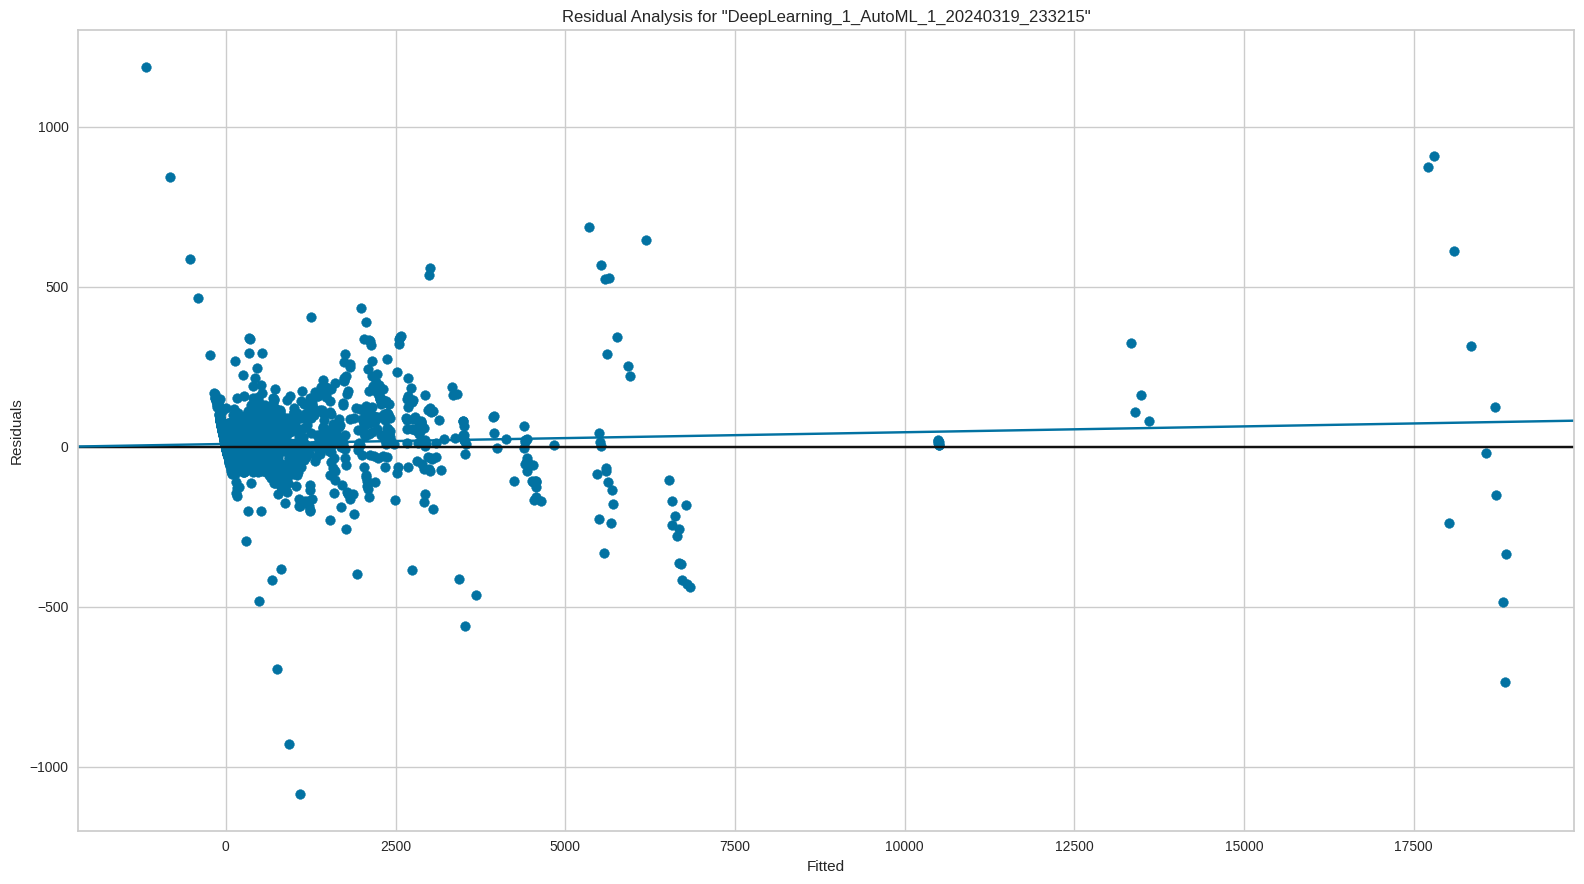

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

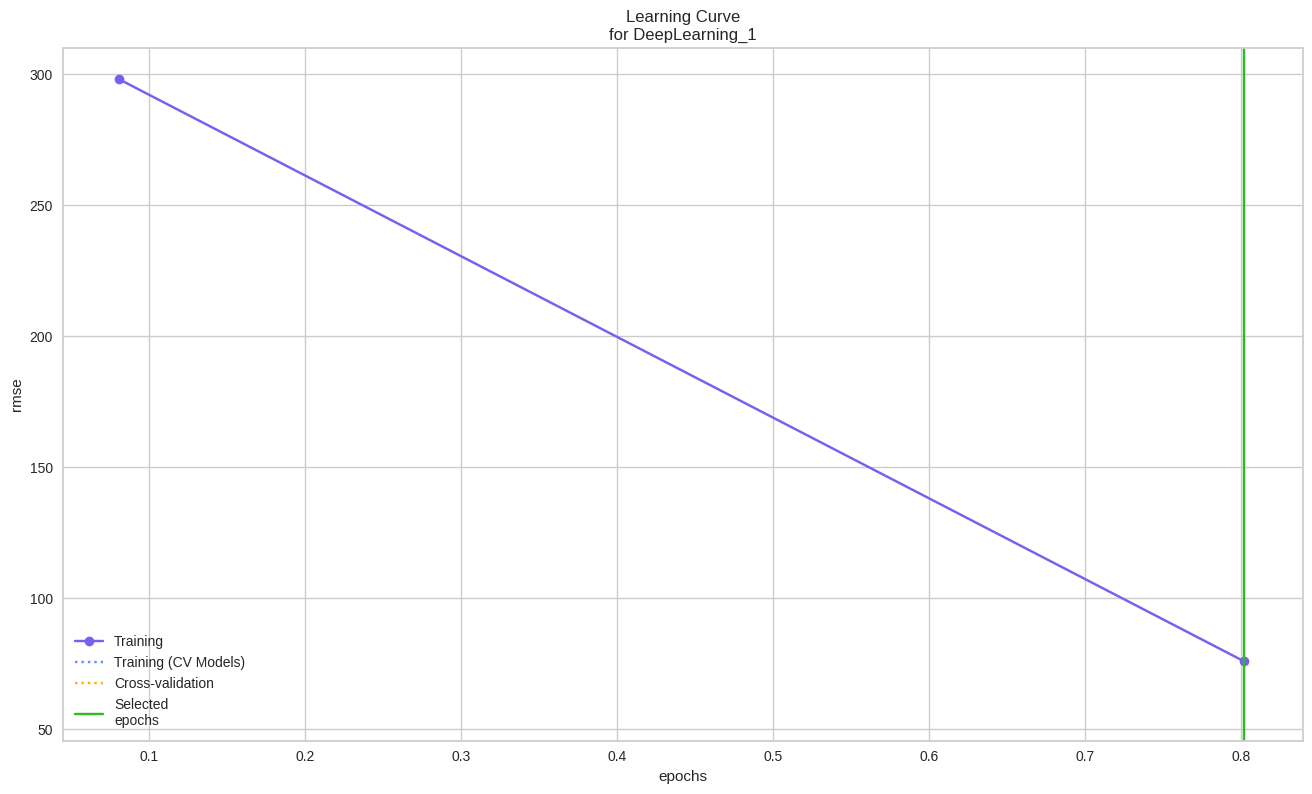

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

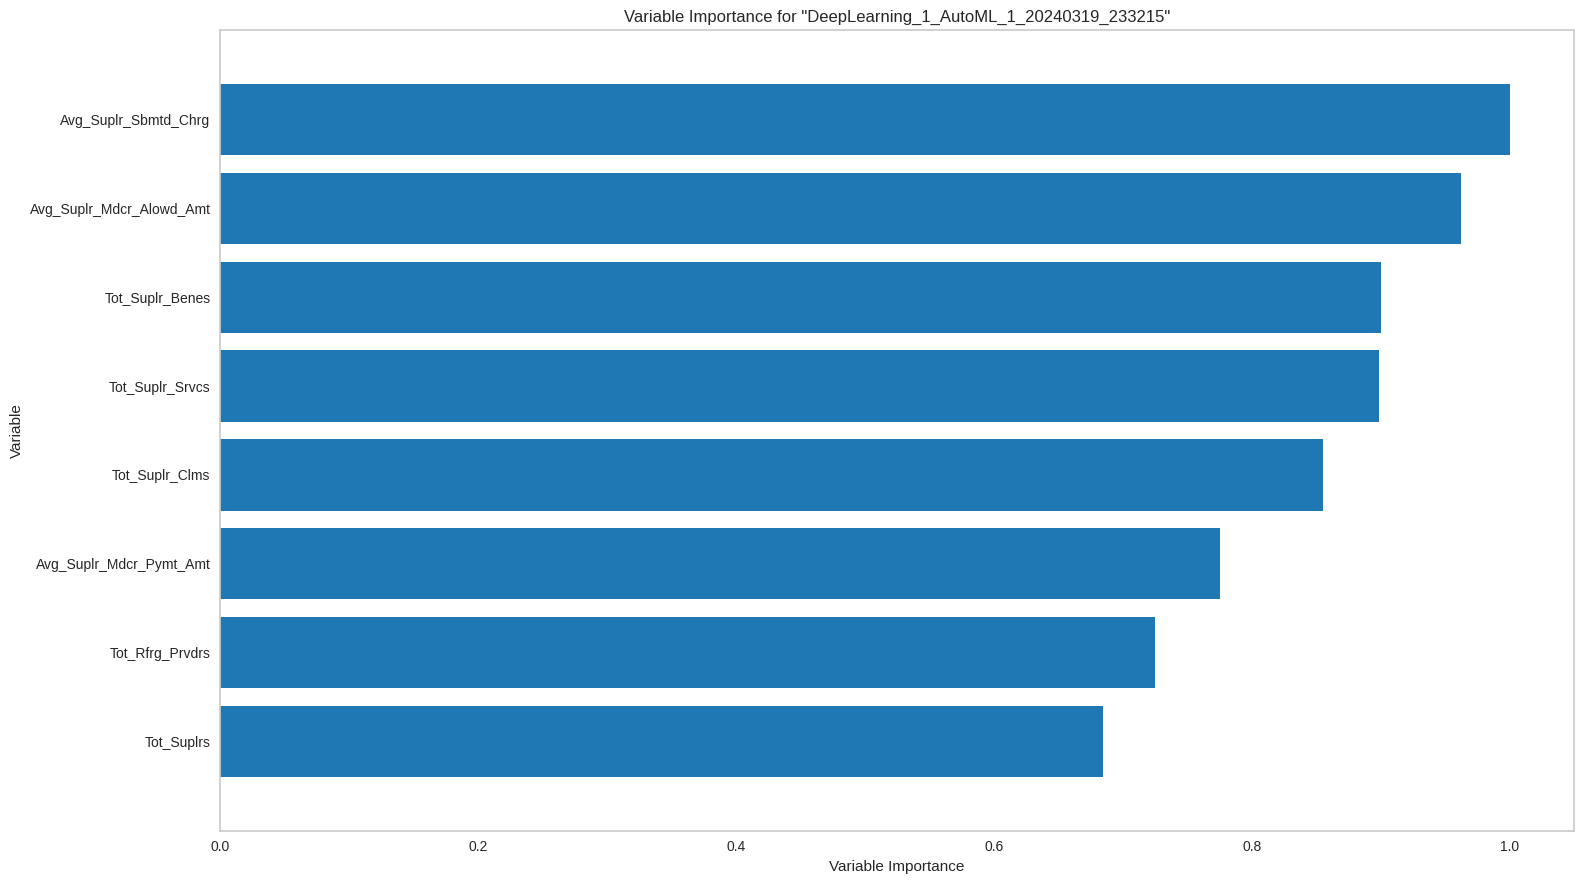

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

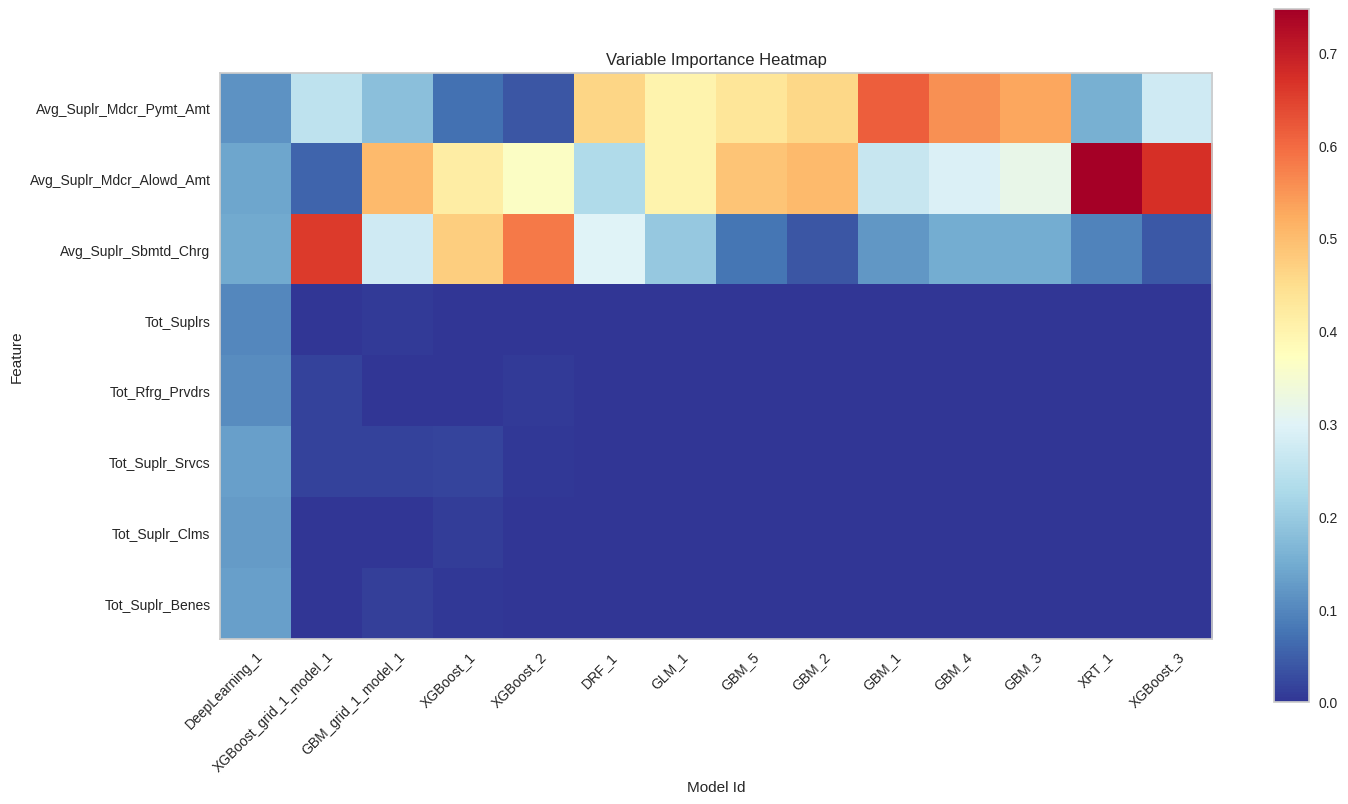

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

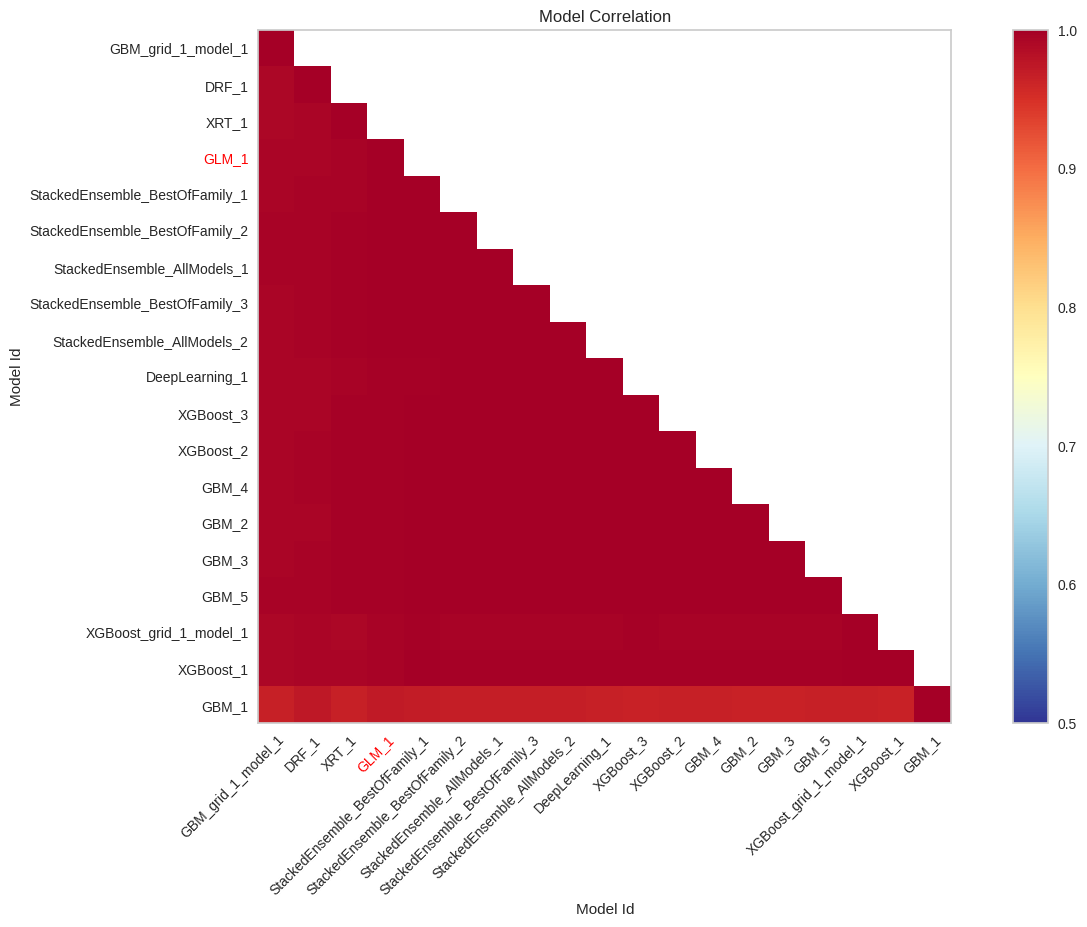

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

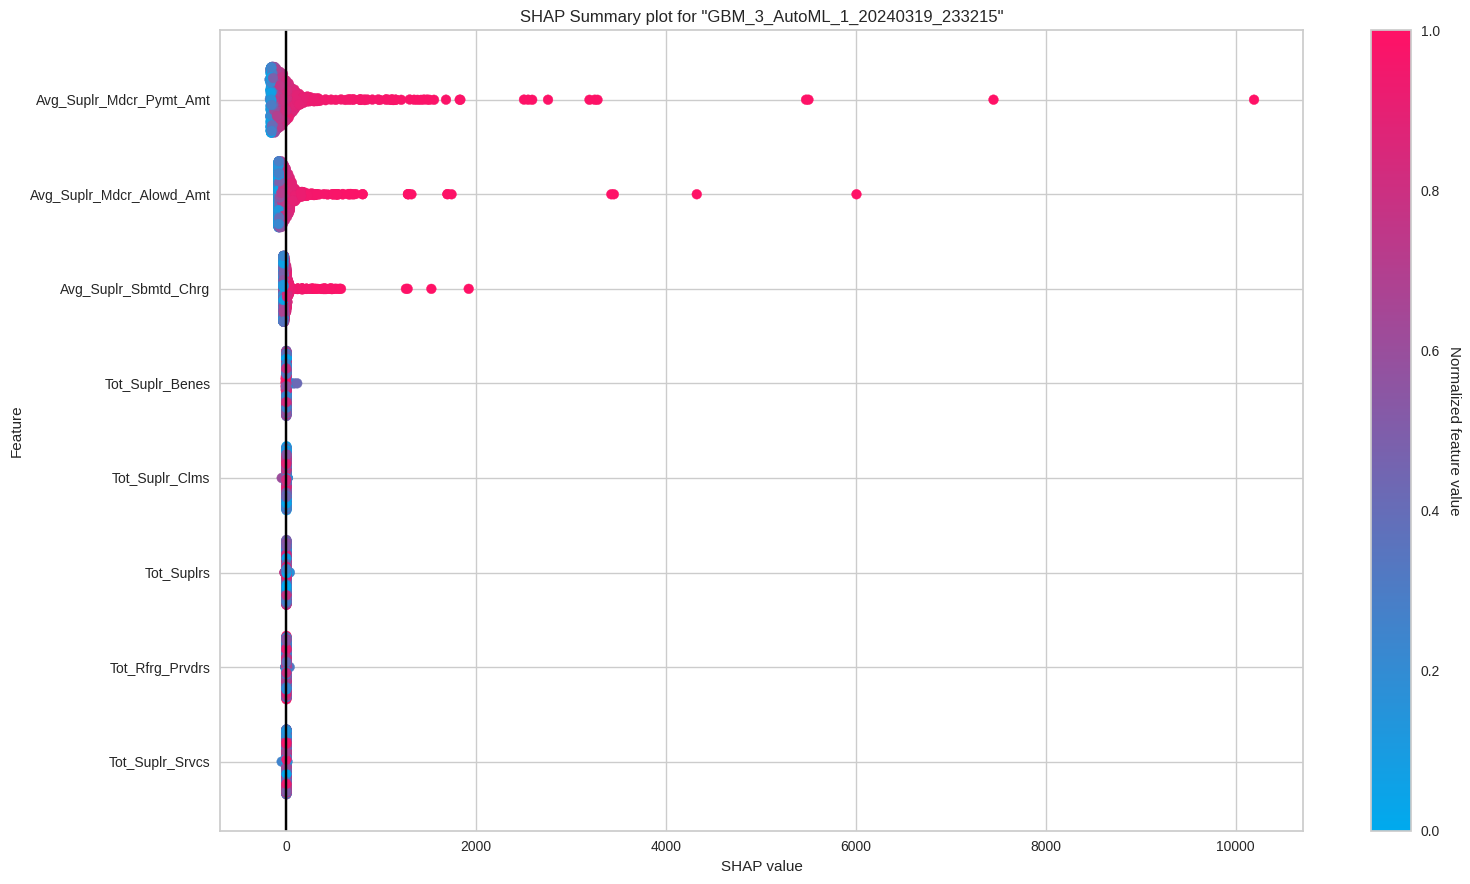

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

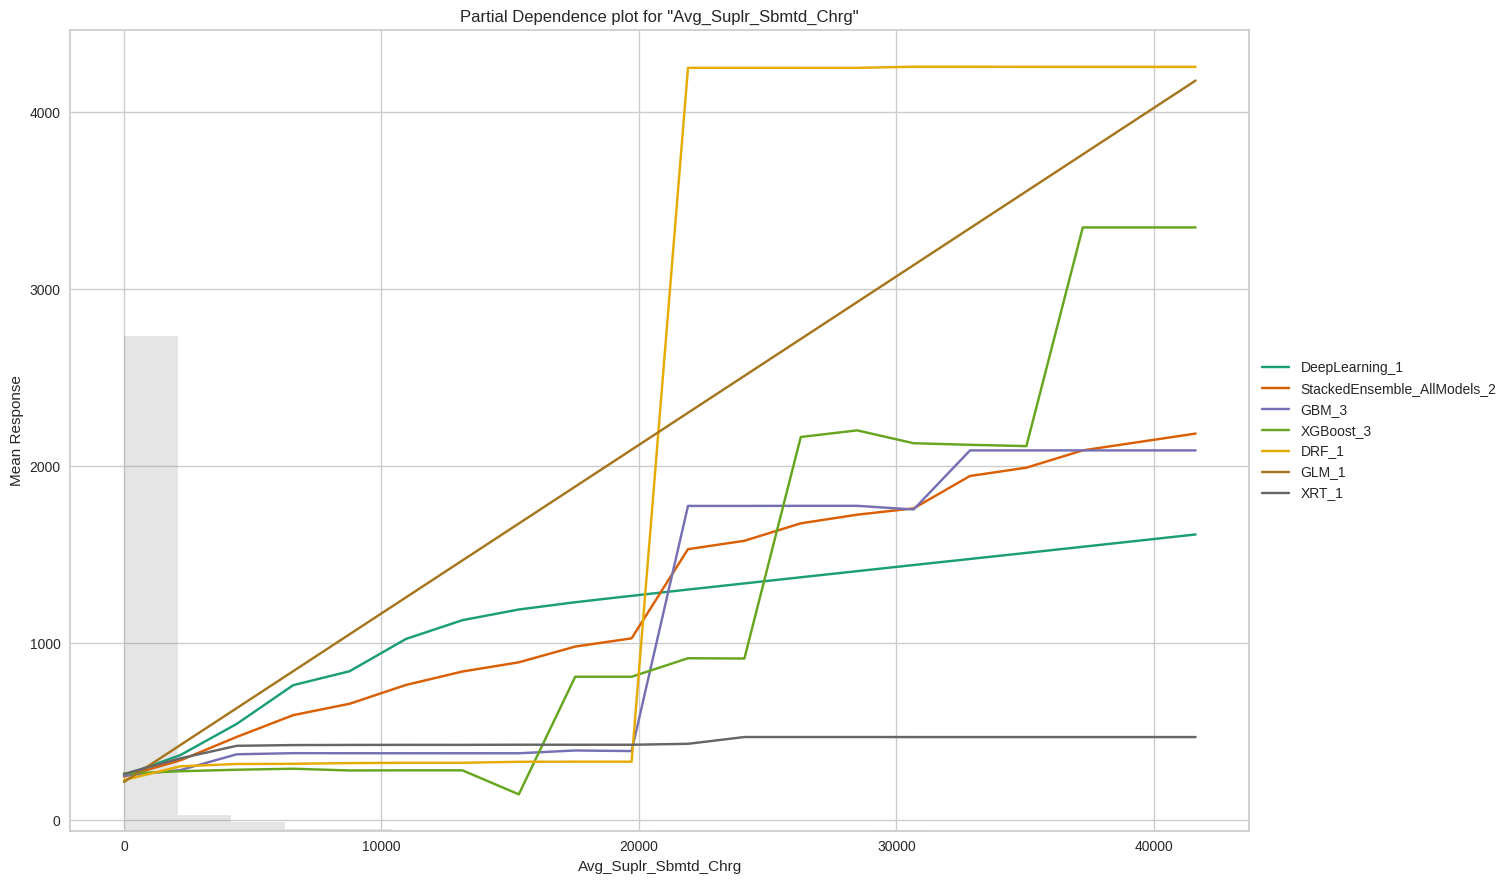

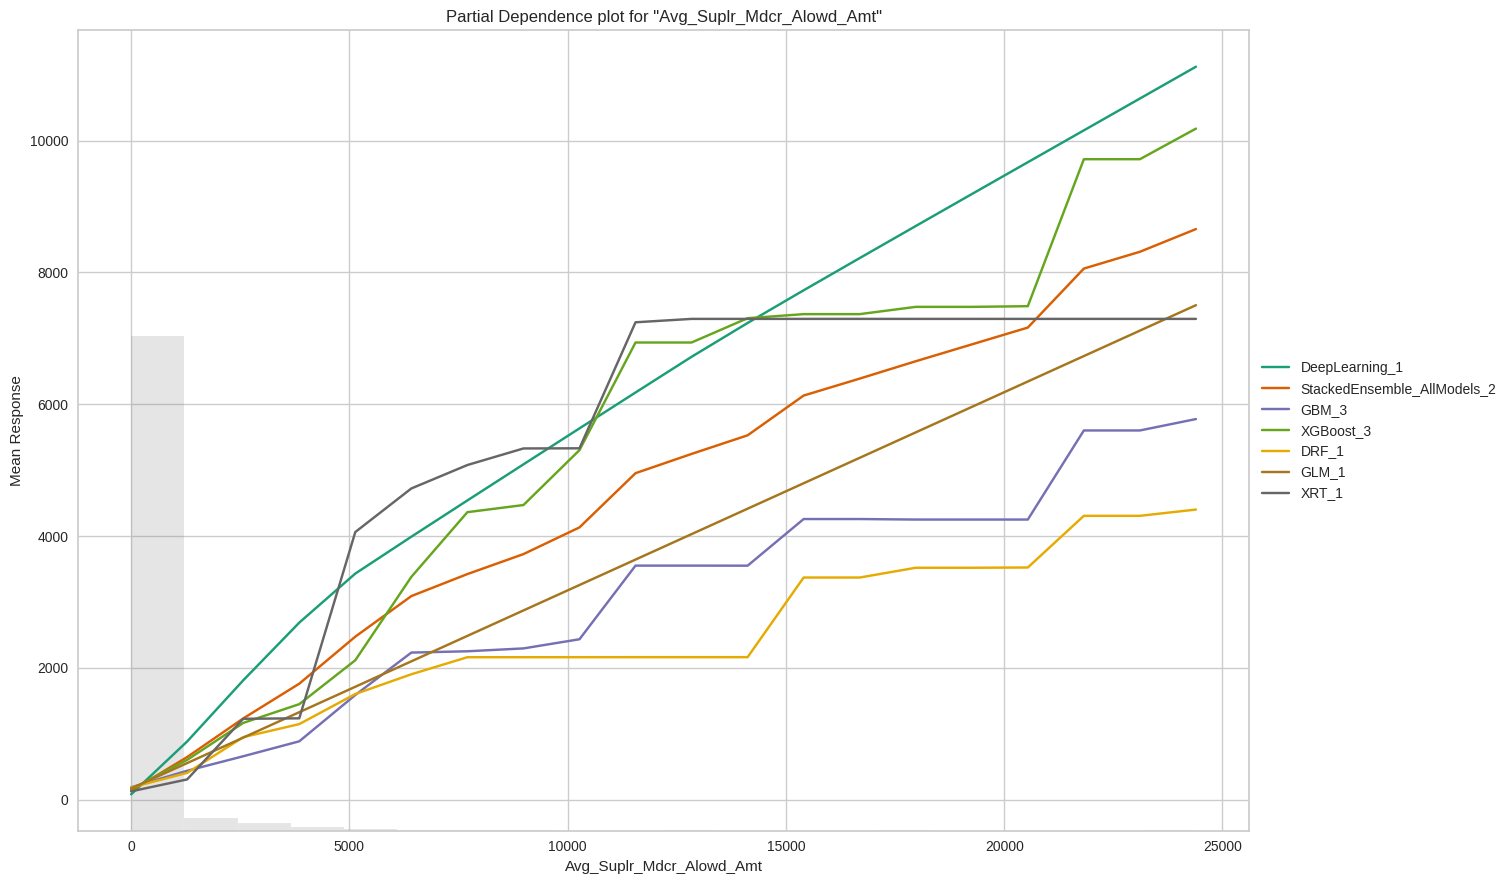

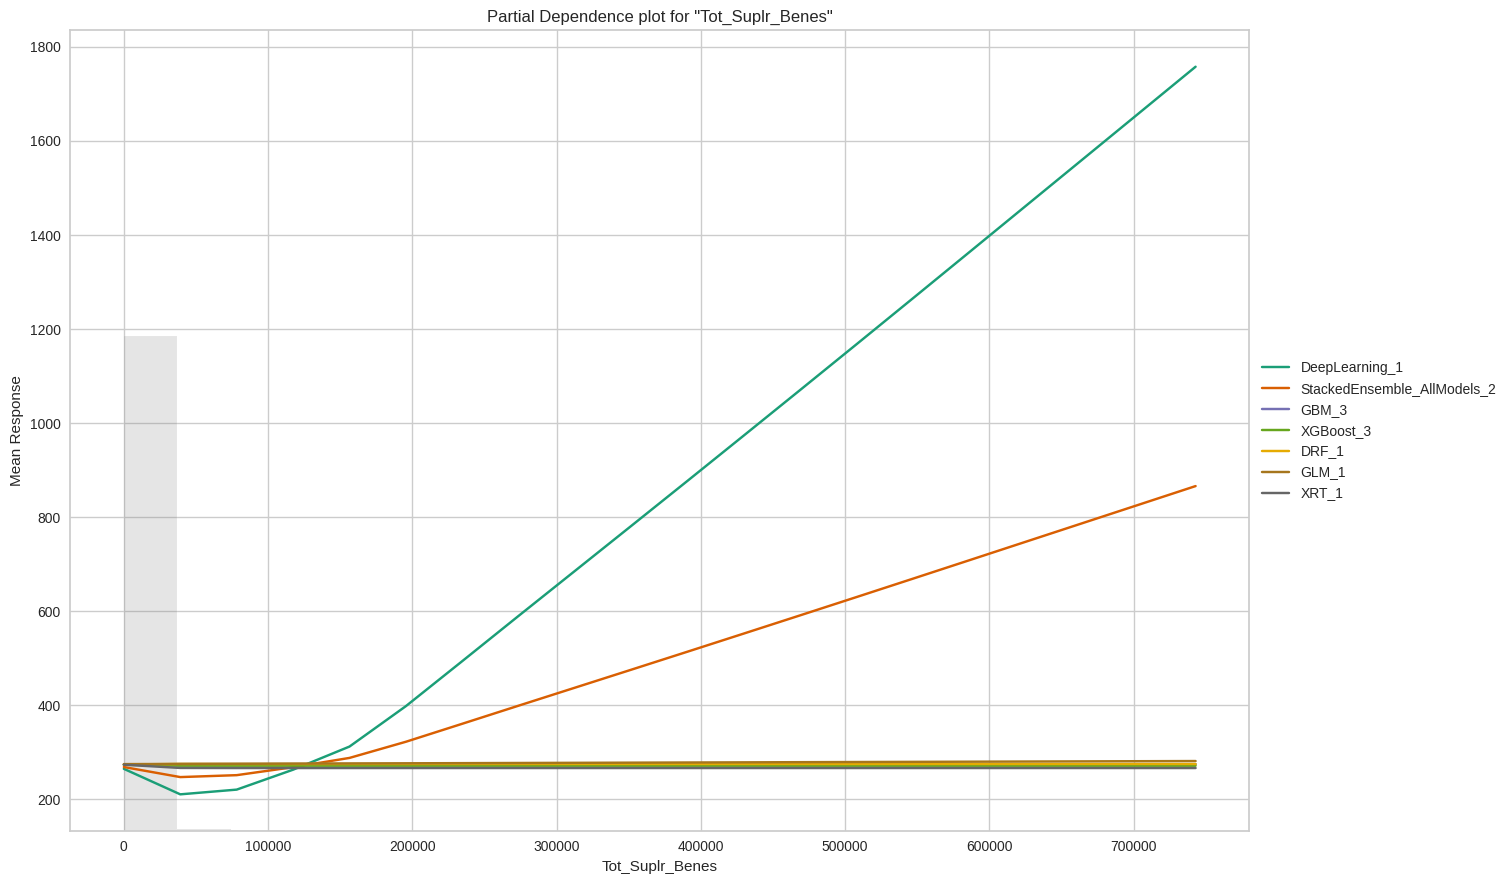

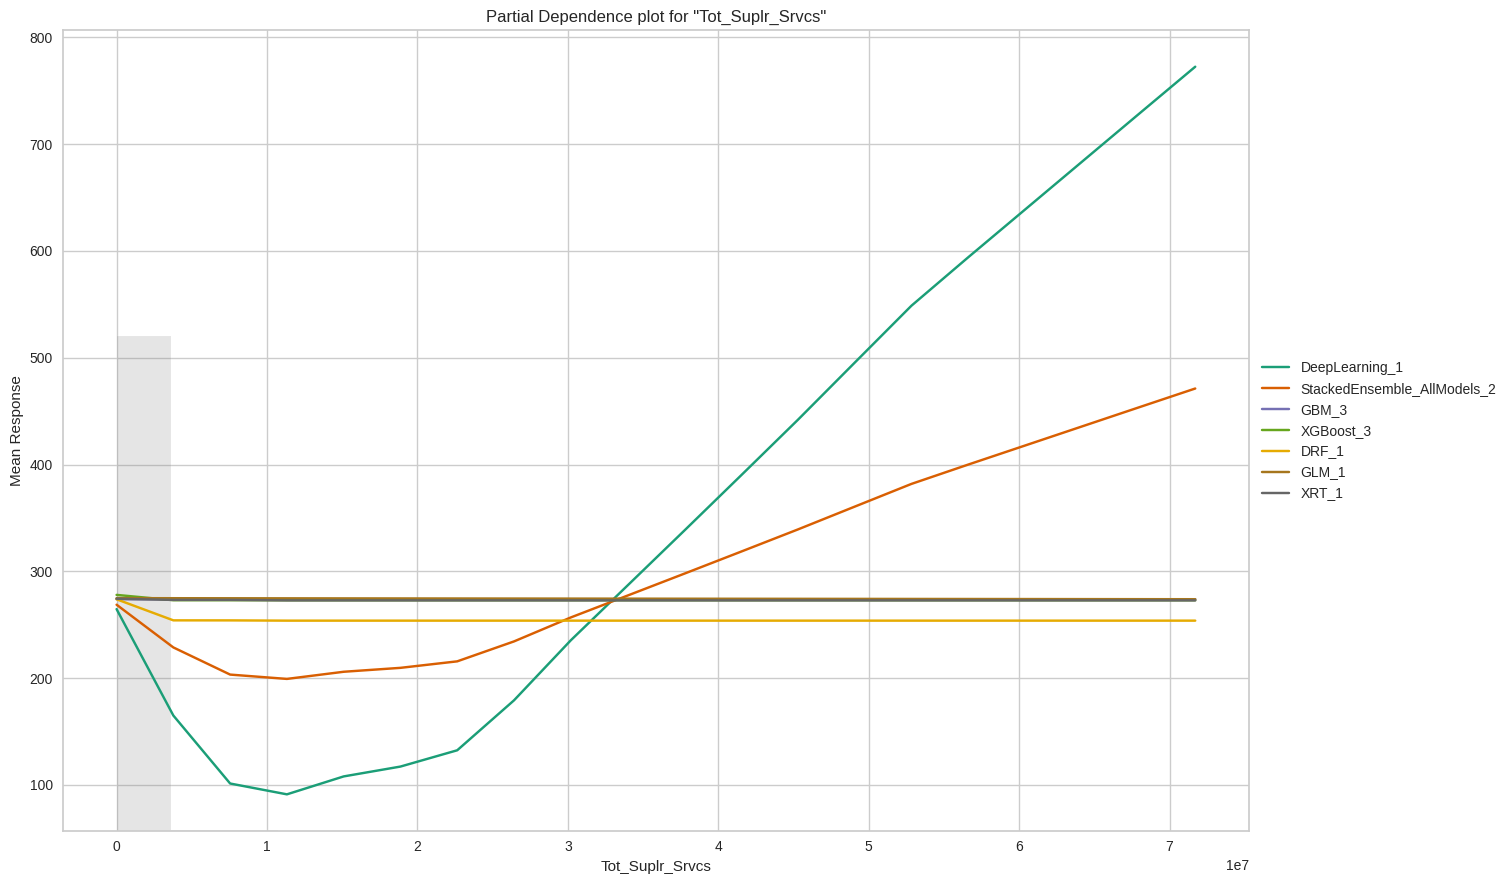

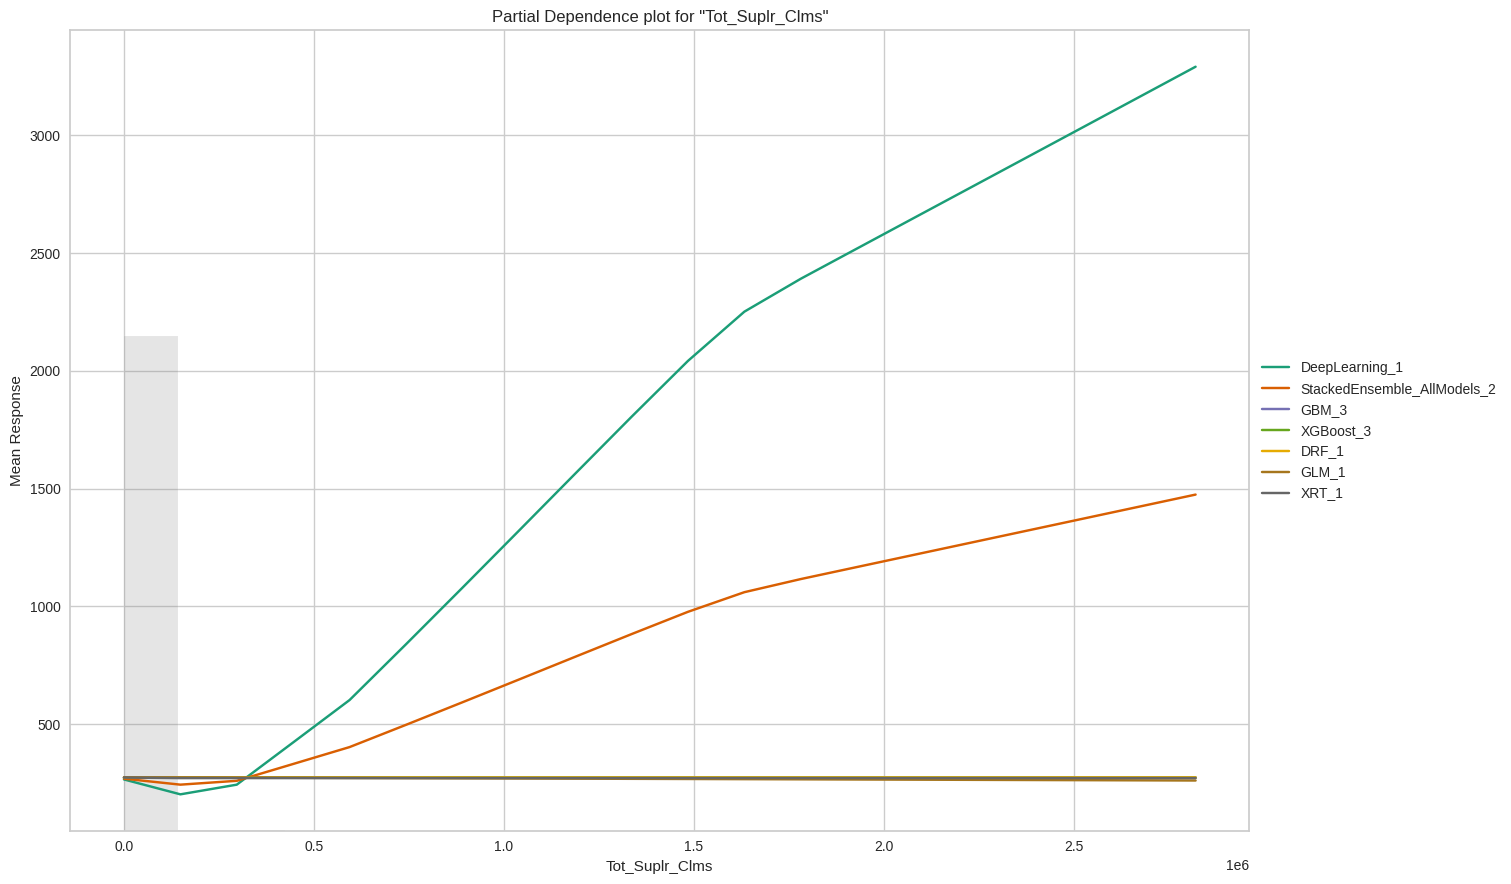

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

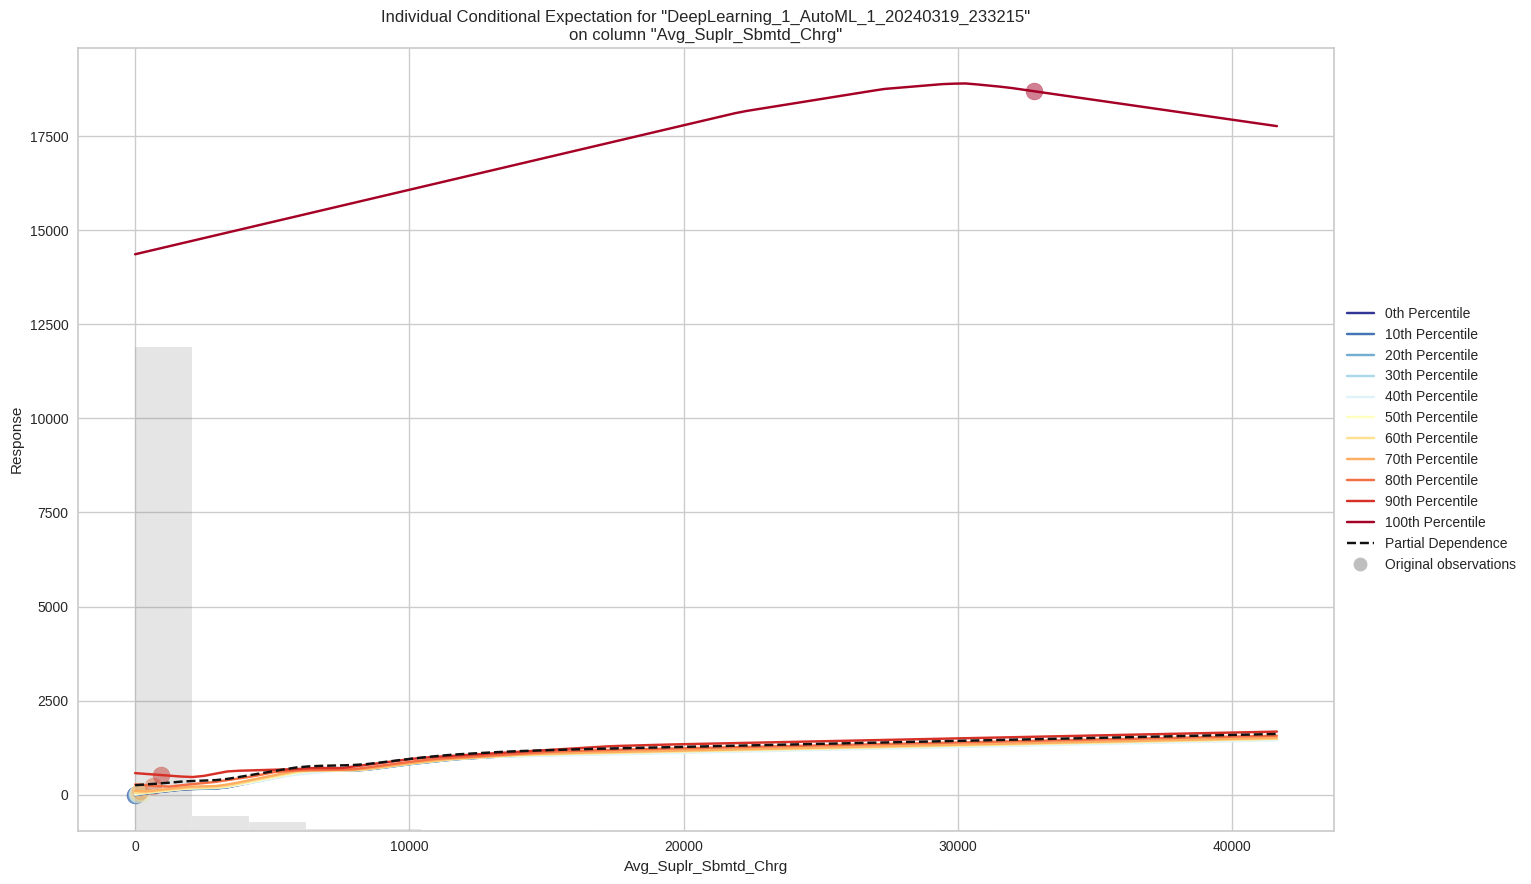

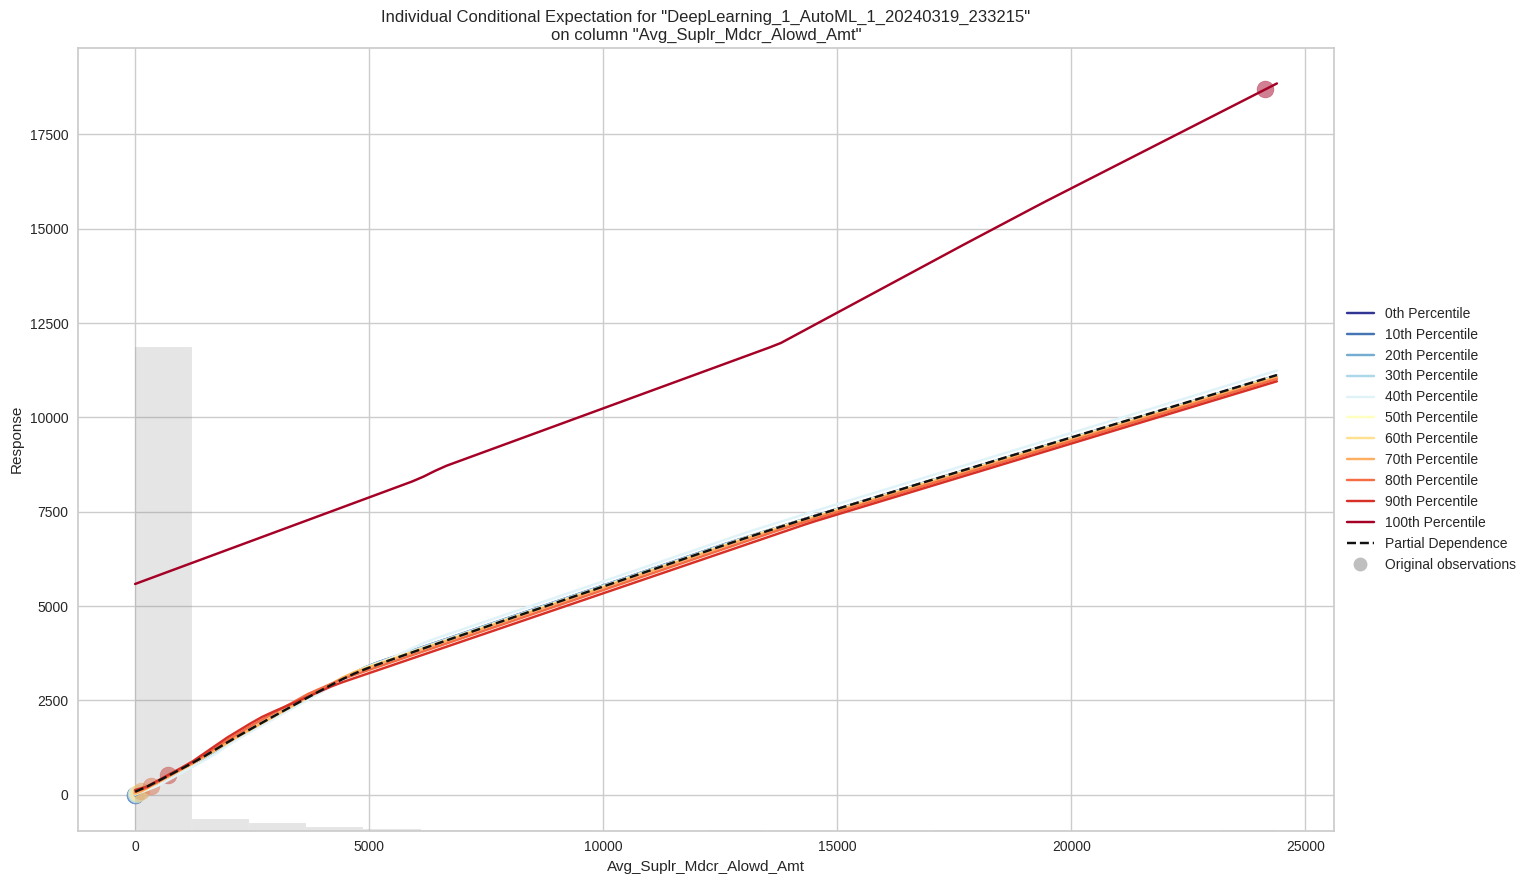

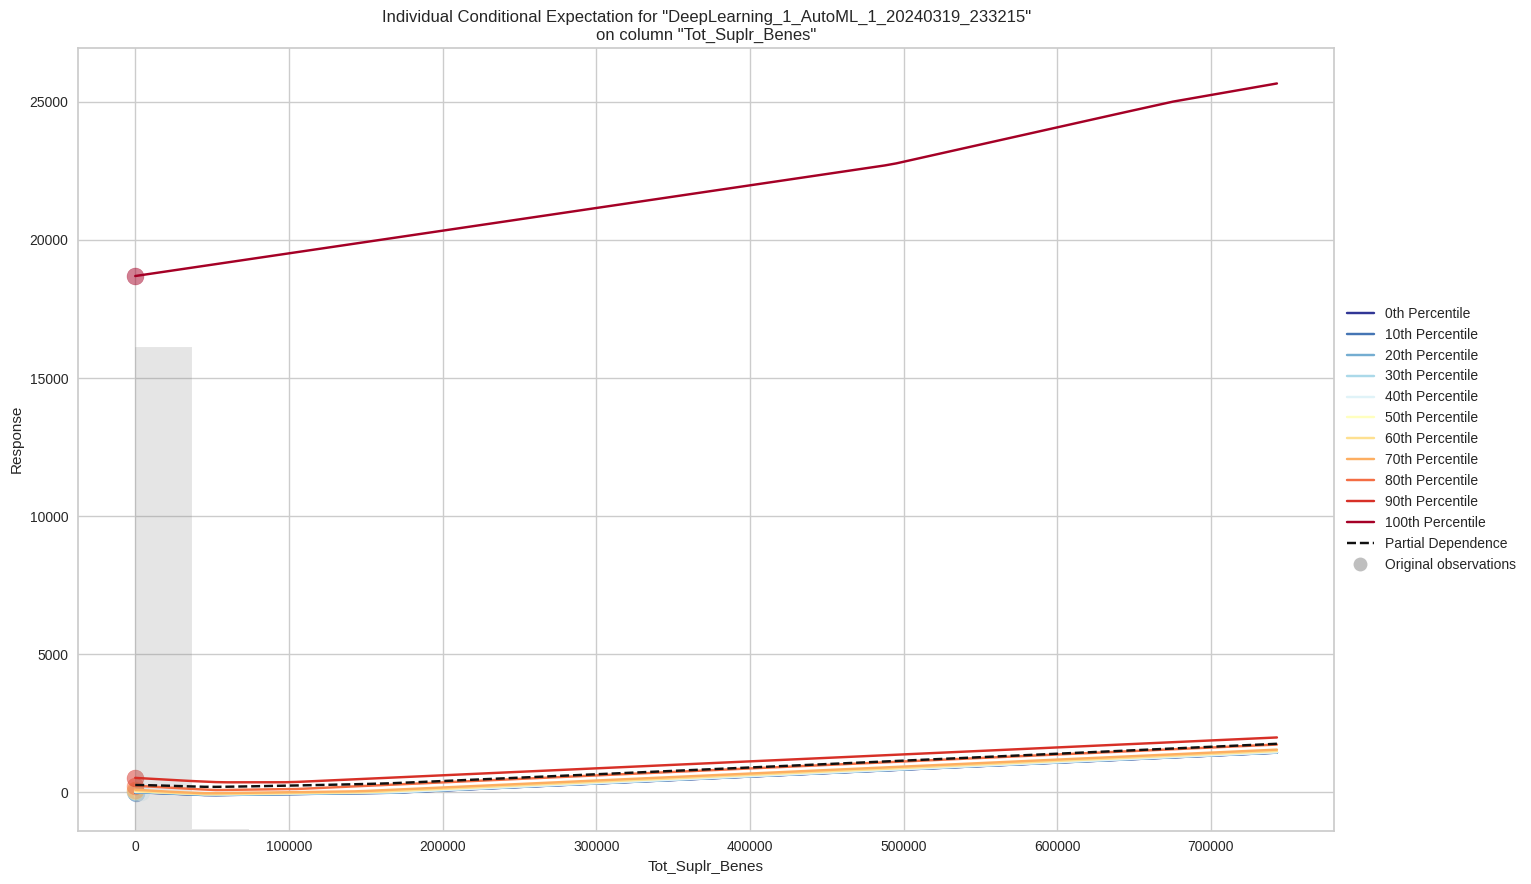

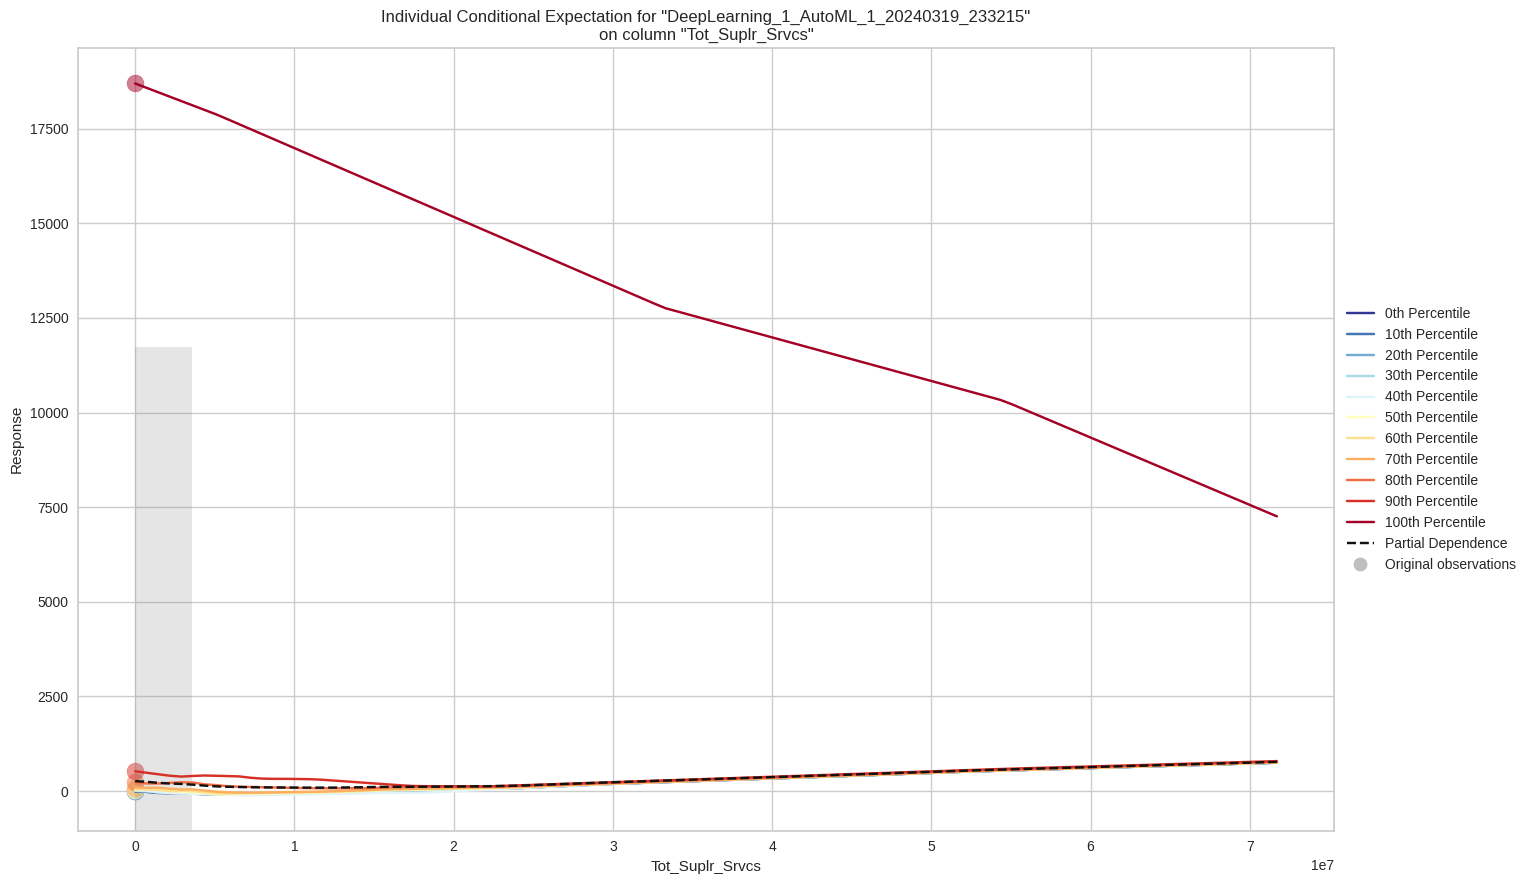

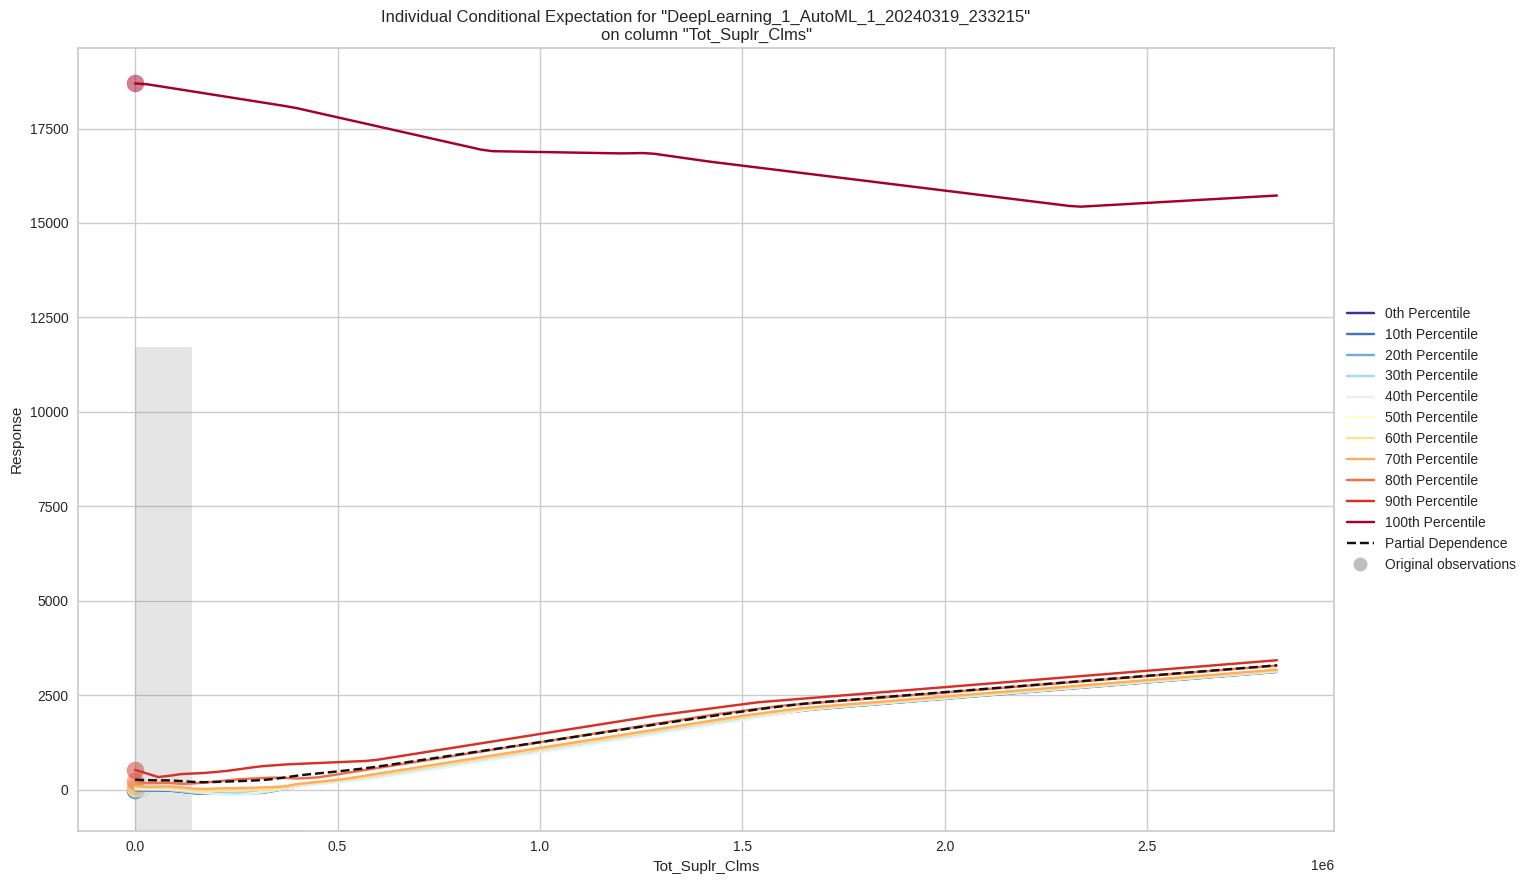

In [ ]:
exa = aml.explain(df_test)

#SHAP

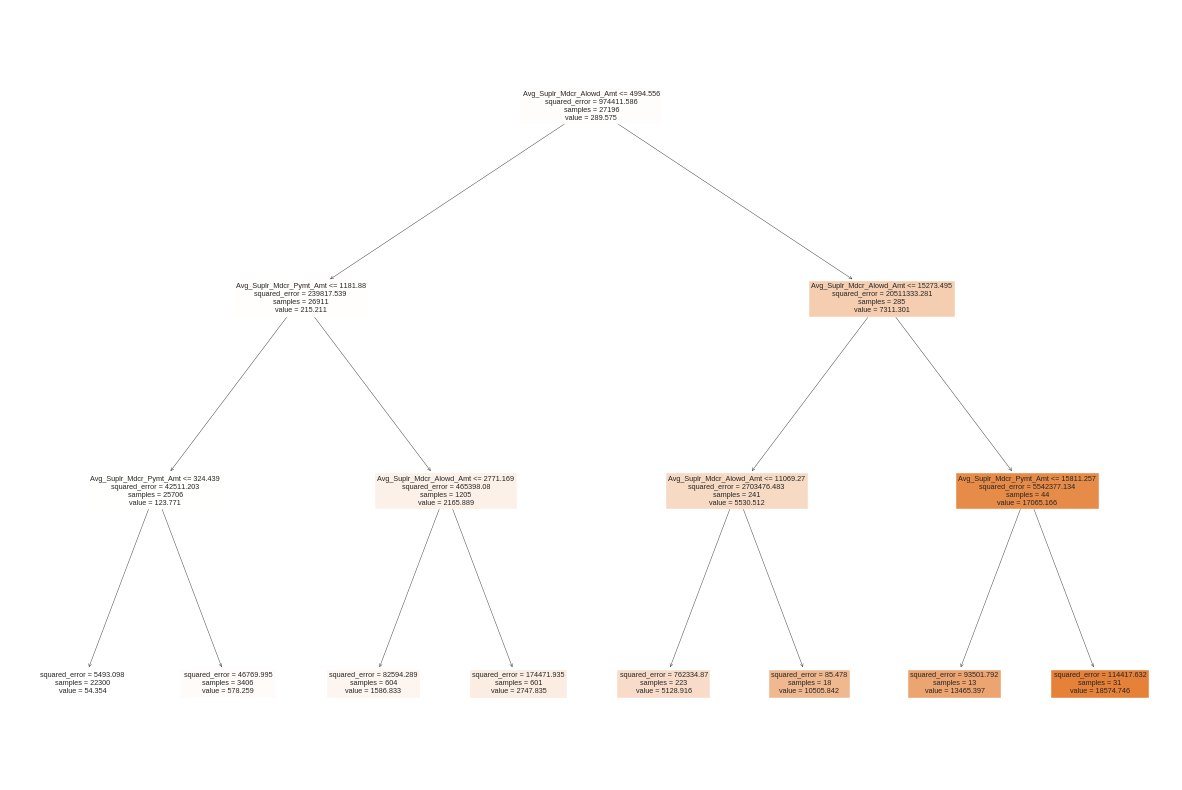

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming your data is already prepared|
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the decision tree model with maximum depth of 3
model_tree = DecisionTreeRegressor(max_depth=3)
model_tree.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model_tree, feature_names=X.columns, filled=True)
plt.show()

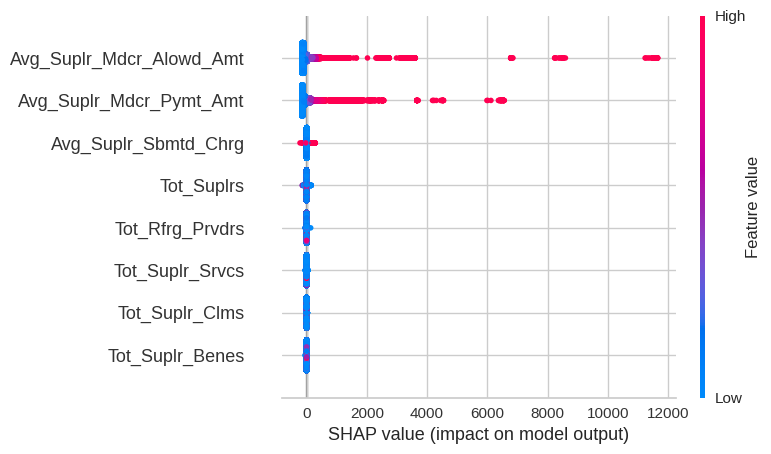

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor

# Train your tree-based model (Random Forest as an example)
model_tree = RandomForestRegressor()
model_tree.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Calculate SHAP values for the tree-based model
explainer_tree = shap.TreeExplainer(model_tree)
shap_values_tree = explainer_tree.shap_values(X)

# Plot SHAP summary plot for tree-based model
shap.summary_plot(shap_values_tree, X)

# LICENSE
MIT License

Copyright (c) 2023 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# References:-
1)AutoMl vs Traditioal ML model-https://www.youtube.com/watch?v=BpK1RMYclsY.


2)The notebbok used for reference-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb.


3)Brief description about Automated ML-https://en.wikipedia.org/wiki/Automated_machine_learning.


4)Dataset used for Analysis-'https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'


5)For refering the questions and the way to answer-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb
